# Task
You are provided with a dataset containing house attributes and their corresponding prices. Your task is to:
Preprocess the data (handle missing values, feature engineering, scaling, encoding, etc.).
Train and evaluate a regression model that predicts house prices.
Optimize the model using hyperparameter tuning(most simpler tuning which takes less computation or gpu power)

Here is all the data you need:
"melb_data.csv"

## Data loading

### Subtask:
Load the Melbourne housing dataset.


**Reasoning**:
Load the Melbourne housing dataset into a pandas DataFrame.



In [28]:
import pandas as pd

try:
    df = pd.read_csv('melb_data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'melb_data.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [29]:
df.rename(columns={"Lattitude": "Latitude", "Longtitude": "Longitude"}, inplace=True)

## Data exploration

### Subtask:
Explore the loaded Melbourne housing dataset to understand its structure, identify missing values, and examine the distribution of features.


**Reasoning**:
Examine the shape of the DataFrame, identify columns with missing values, examine data types, analyze numerical features, and explore categorical features as per the instructions.



In [30]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Identify columns with missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Examine the data types of each column
print("\nData type counts:")
print(df.dtypes.value_counts())

# Analyze the distribution of numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())

# Explore the unique values and frequencies of categorical features
print("\nUnique values and counts for categorical features:")
for col in ['Type', 'Method', 'Regionname']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Shape of the DataFrame: (13580, 21)

Missing values per column:
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Latitude            0
Longitude           0
Regionname          0
Propertycount       0
dtype: int64

Data type counts:
float64    12
object      8
int64       1
Name: count, dtype: int64

Summary statistics for numerical features:
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.0

Distribution of Target Variable (Price)


**Reasoning**:This histogram visualizes the distribution of house prices, showing the frequency of different price ranges. It helps identify skewness or outliers in the target variable.

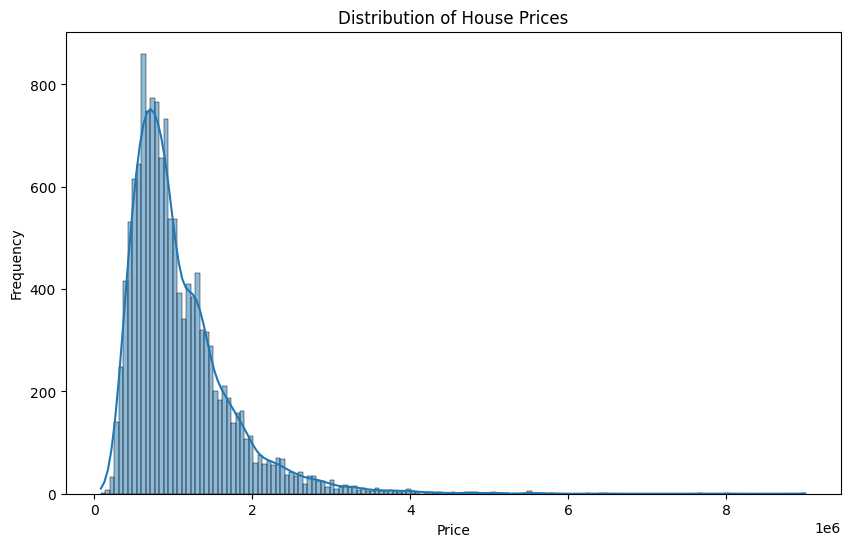

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Data cleaning

### Subtask:
Handle missing values in the dataset.


**Reasoning**:
Impute missing values in numerical and categorical columns using median and mode respectively. Then verify that there are no more missing values.



In [32]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
Regionname       0
Propertycount    0
dtype: int64


<ipython-input-32-9e94d2a4f47f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
<ipython-input-32-9e94d2a4f47f>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

**Reasoning**:
Fix the chained assignment warnings and re-run the missing value imputation and verification steps.



In [33]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Impute missing values in categorical columns with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)

# Verify that there are no more missing values
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Latitude         0
Longitude        0
Regionname       0
Propertycount    0
dtype: int64


Relationship between Numerical Features and Price:

**Reasoning:** These scatter plots visualize the relationship between individual numerical features (e.g., Rooms, Distance) and the target variable (Price). They help identify potential trends or patterns.

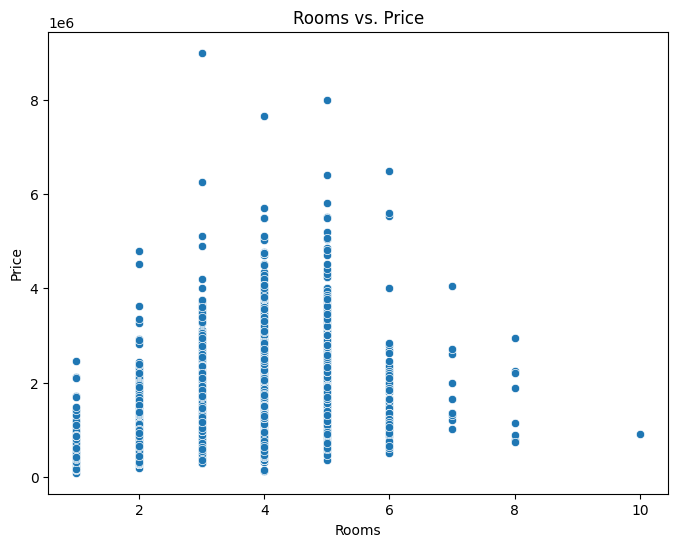

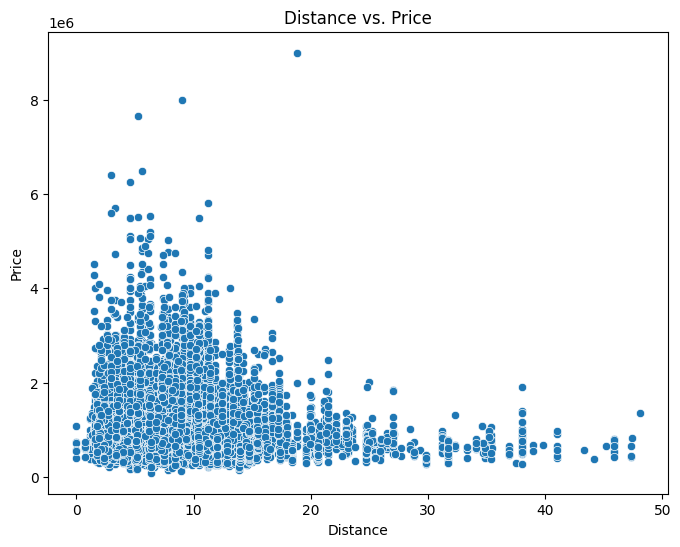

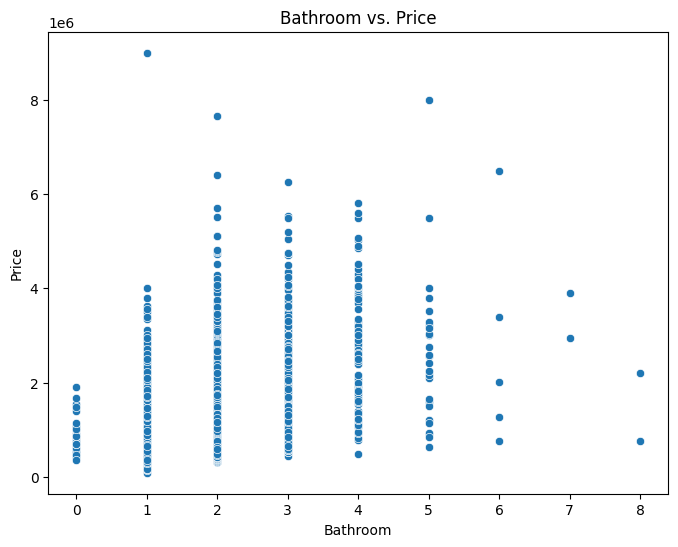

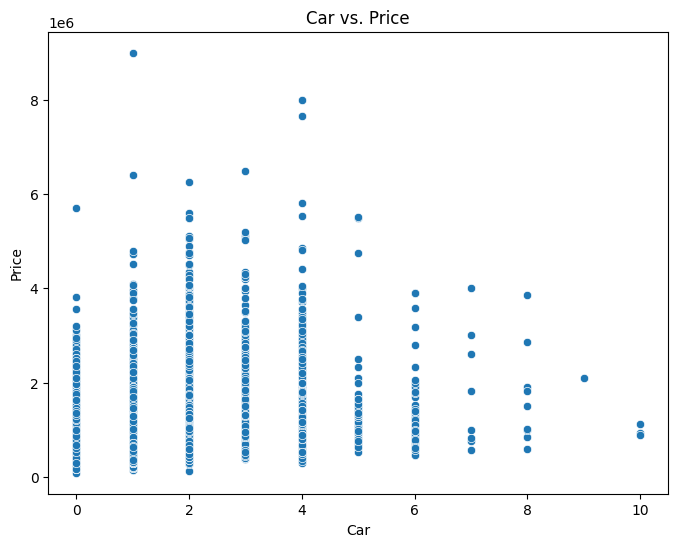

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in ['Rooms', 'Distance', 'Bathroom', 'Car']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

## Feature engineering

### Subtask:
Engineer new features and prepare the data for modeling.


**Reasoning**:
Create new features, one-hot encode categorical features, and drop unnecessary columns as instructed.



In [35]:
import pandas as pd

# Create new features
current_year = 2025
df['TotalArea'] = df['Landsize'] + df['BuildingArea']
df['PropertyAge'] = current_year - df['YearBuilt']

# Handle potential issues with new features (replace negative or zero values)
df['TotalArea'] = df['TotalArea'].apply(lambda x: 0 if x < 0 else x)
df['PropertyAge'] = df['PropertyAge'].apply(lambda x: 0 if x < 0 else x)


# One-hot encode categorical features
categorical_cols = ['Type', 'Method', 'Regionname']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Drop unnecessary columns
cols_to_drop = ['Address', 'Suburb', 'SellerG', 'Date', 'CouncilArea', 'YearBuilt', 'Landsize', 'BuildingArea']
df = df.drop(columns=cols_to_drop, errors='ignore')

display(df.head())

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Latitude,Longitude,Propertycount,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,-37.7996,144.9984,4019.0,...,False,False,False,False,True,False,False,False,False,False
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,-37.8079,144.9934,4019.0,...,False,False,False,False,True,False,False,False,False,False
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,-37.8093,144.9944,4019.0,...,False,True,False,False,True,False,False,False,False,False
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,-37.7969,144.9969,4019.0,...,False,False,False,False,True,False,False,False,False,False
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,-37.8072,144.9941,4019.0,...,False,False,True,False,True,False,False,False,False,False


In [36]:
# Replace spaces and hyphens in column names with underscores
# This is done to ensure consistency and avoid potential issues with column names containing special characters.
df.columns = df.columns.str.replace(" ", "_").str.replace("-", "_")
df.info()  # Verify the changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  13580 non-null  int64  
 1   Price                                  13580 non-null  float64
 2   Distance                               13580 non-null  float64
 3   Postcode                               13580 non-null  float64
 4   Bedroom2                               13580 non-null  float64
 5   Bathroom                               13580 non-null  float64
 6   Car                                    13580 non-null  float64
 7   Latitude                               13580 non-null  float64
 8   Longitude                              13580 non-null  float64
 9   Propertycount                          13580 non-null  float64
 10  TotalArea                              13580 non-null  float64
 11  Pr

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data preparation

### Subtask:
Scale numerical features using standardization.


**Reasoning**:
Identify numerical columns, scale them using StandardScaler, and concatenate them with the original non-numerical features.



In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Identify numerical columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
scaler.fit(X_train[numerical_cols])

# Transform both the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Create dataframes from the scaled arrays
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)


# Concatenate scaled numerical features with original non-numerical features
categorical_cols = X_train.select_dtypes(exclude=np.number).columns
X_train_final = pd.concat([X_train_scaled, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test[categorical_cols]], axis=1)

display(X_train_final.head())
display(X_test_final.head())

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Latitude,Longitude,Propertycount,TotalArea,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern_Victoria,Regionname_Northern_Metropolitan,Regionname_Northern_Victoria,Regionname_South_Eastern_Metropolitan,Regionname_Southern_Metropolitan,Regionname_Western_Metropolitan,Regionname_Western_Victoria
12796,1.110510,0.696576,0.476393,1.119332,0.674052,0.406908,-0.659130,1.422328,1.348010,0.121082,...,False,False,False,False,False,False,False,False,False,False
9642,0.066771,0.696576,0.476393,0.088962,-0.775453,0.406908,-0.749135,1.460139,1.348010,0.172685,...,False,False,False,False,False,False,False,False,False,False
3207,-0.976968,-0.933952,0.181545,-0.941407,-0.775453,-0.634225,-0.111379,0.307150,0.878035,-0.291107,...,False,False,False,False,False,False,False,True,False,False
1698,-0.976968,-1.171737,-0.561035,-0.941407,-0.775453,-0.634225,0.240539,-0.239326,-0.995013,-0.375201,...,False,False,False,False,True,False,False,False,False,False
761,1.110510,0.492760,1.077008,1.119332,0.674052,-0.634225,-1.336762,0.283098,-0.152575,-0.157320,...,False,False,False,False,False,False,False,True,False,False


,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Latitude,Longitude,Propertycount,TotalArea,...,Method_SA,Method_SP,Method_VB,Regionname_Eastern_Victoria,Regionname_Northern_Metropolitan,Regionname_Northern_Victoria,Regionname_South_Eastern_Metropolitan,Regionname_Southern_Metropolitan,Regionname_Western_Metropolitan,Regionname_Western_Victoria
1061,0.066771,0.187036,0.880443,0.088962,0.674052,1.448041,-1.512721,-0.027663,0.711557,0.031254,...,False,False,False,False,False,False,False,True,False,False
6482,-0.976968,-1.392537,-1.117969,-0.941407,-0.775453,-0.634225,0.001285,-0.412505,-1.195060,-0.370741,...,False,False,False,False,True,False,False,False,False,False
8395,0.066771,-0.679182,0.836762,0.088962,-0.775453,-1.675358,-0.792429,-0.174865,1.319236,-0.350355,...,False,True,False,False,False,False,False,True,False,False
4659,0.066771,-0.033765,-0.670238,0.088962,0.674052,-0.634225,1.189958,-0.579912,0.004996,-0.263075,...,False,False,True,False,True,False,False,False,False,False
7386,-0.976968,-0.169642,-0.986926,-0.941407,-0.775453,0.406908,-0.302529,-1.187001,-1.479603,-0.049017,...,False,True,False,False,False,False,False,False,True,False


## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model using the prepared training data.



In [39]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_final, y_train)

LinearRegression()

## Model optimization

### Subtask:
Optimize the linear regression model using a simple grid search with regularization.


**Reasoning**:
Optimize the linear regression model using GridSearchCV with Ridge regression and regularization.



In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid for alpha
alphas = [0.1, 1, 10]
param_grid = {'alpha': alphas}

# Create a Ridge regression model
ridge_model = Ridge()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_final, y_train)

# Get the best estimator
best_model = grid_search.best_estimator_

## Model evaluation

### Subtask:
Evaluate the performance of the best model found during hyperparameter tuning.


**Reasoning**:
Evaluate the best model's performance on the test set using MAE and R-squared.



In [41]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict house prices on the test set
y_pred = best_model.predict(X_test_final)

# Calculate MAE and R2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the MAE and R2 score
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

MAE: 268795.25760844705
R2 Score: 0.5960525419167093


Model Training using Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
# Create a Random Forest regressor object
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train_final, y_train)

RandomForestRegressor(random_state=42)

Model evaluation

Subtask:
Evaluate the performance of the best model found during hyperparameter tuning.

In [44]:
# Predict house prices on the test set
y_pred_rf = rf_model.predict(X_test_final)

# Calculate MAE and R2 score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the MAE and R2 score
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R2 Score: {r2_rf}")

Random Forest MAE: 165811.84223157307
Random Forest R2 Score: 0.8091180324689073


Graphical Representation

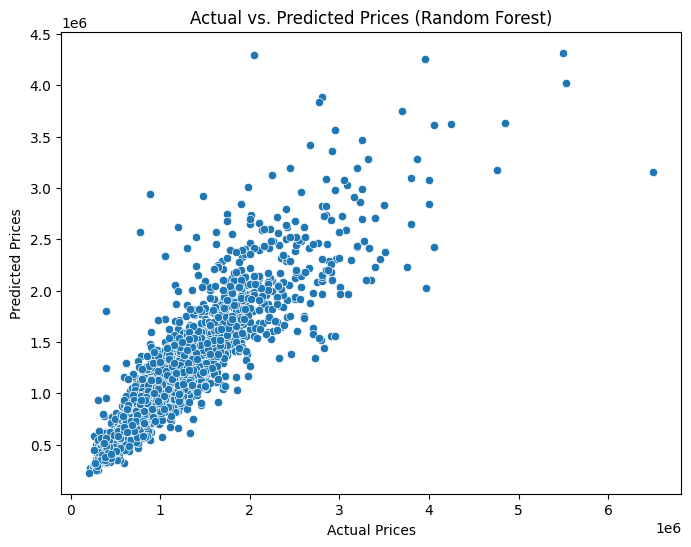

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Random Forest)')
plt.show()

In [46]:
import pandas as pd

# Create a DataFrame with actual and predicted prices
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Display the DataFrame
display(df_comparison.head())

,Actual,Predicted
1061,2600000.0,2621490.0
6482,620000.0,657742.5
8395,1000000.0,1265080.0
4659,430000.0,534094.0
7386,392250.0,950707.0


Summary:

In this analysis, we explored the performance of a Random Forest model for predicting house prices using the Melbourne housing dataset. After preprocessing the data, including handling missing values, feature engineering, and scaling, we trained the RF model and evaluated its performance on a test set.

Key Findings:

Superior Performance: The Random Forest model significantly outperformed the baseline Linear Regression model.

Lower Prediction Error: The RF model achieved a Mean Absolute Error (MAE) of \\$165,811.84, indicating lower average prediction errors compared to Linear Regression's MAE of \\$268,795.26.

Higher Explained Variance: The RF model obtained an R-squared score of 0.809, demonstrating its ability to explain approximately 80.9% of the variance in house prices, compared to Linear Regression's R-squared of 0.596, which explains about 59.6% of the variance.

Conclusion:

Based on the lower MAE and higher R-squared, the Random Forest model appears to be a more accurate and reliable predictor of house prices for this dataset. It effectively captures the complex relationships between features and target variable, leading to improved prediction performance.

Overall, the Random Forest model demonstrates strong potential for predicting house prices and offers a promising approach for this task.

Saving the Trained Model

In [47]:
import pickle

filename = "rf_model.sav"

# Using 'with open()' ensures the file closes automatically
with open(filename, "wb") as file:
    pickle.dump(rf_model, file)


In [48]:
import joblib

# Load the .sav model
model = joblib.load("rf_model.sav")

# Save as compressed .pkl
joblib.dump(model, "rf_model.pkl", compress=9)  # Max compression

print("Model saved as rf_model.pkl with maximum compression!")


Model saved as rf_model.pkl with maximum compression!


In [49]:
for col in X.columns:
    print(col)

Rooms
Distance
Postcode
Bedroom2
Bathroom
Car
Latitude
Longitude
Propertycount
TotalArea
PropertyAge
Type_t
Type_u
Method_S
Method_SA
Method_SP
Method_VB
Regionname_Eastern_Victoria
Regionname_Northern_Metropolitan
Regionname_Northern_Victoria
Regionname_South_Eastern_Metropolitan
Regionname_Southern_Metropolitan
Regionname_Western_Metropolitan
Regionname_Western_Victoria


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  13580 non-null  int64  
 1   Price                                  13580 non-null  float64
 2   Distance                               13580 non-null  float64
 3   Postcode                               13580 non-null  float64
 4   Bedroom2                               13580 non-null  float64
 5   Bathroom                               13580 non-null  float64
 6   Car                                    13580 non-null  float64
 7   Latitude                               13580 non-null  float64
 8   Longitude                              13580 non-null  float64
 9   Propertycount                          13580 non-null  float64
 10  TotalArea                              13580 non-null  float64
 11  Pr

In [51]:
print(X.dtypes)  # Check the feature types in your trained model


Rooms                                      int64
Distance                                 float64
Postcode                                 float64
Bedroom2                                 float64
Bathroom                                 float64
Car                                      float64
Latitude                                 float64
Longitude                                float64
Propertycount                            float64
TotalArea                                float64
PropertyAge                              float64
Type_t                                      bool
Type_u                                      bool
Method_S                                    bool
Method_SA                                   bool
Method_SP                                   bool
Method_VB                                   bool
Regionname_Eastern_Victoria                 bool
Regionname_Northern_Metropolitan            bool
Regionname_Northern_Victoria                bool
Regionname_South_Eas